# Instacart Final Project Notebook
## 01 Import Libraries
## 02 Import Data
## 03 Address Security Implications (PII)
## 04 Compare Customer Data within Geographic Locations
### A. Create Region Variable
### B. Create Crosstab - Regions & SpendFlag
## 05 Create Exclusion Flag for Low Activity Customers
### A. Create Exclusion Variable
### B. Create a Dataframe Excluding Low Activity Customers
### C. Export New Dataframe
## 06 Import Departments Data and Merge
## 07 Create Profiling Variables
### A. Profiling variable by Generation (Age)
#### - Visualization
#### - min/max/mean (prices & order number)
### B. Profiling variable by Income Class (income, dependants, & fam_status)¶
#### - Visualization
#### - min/max/mean (prices & order number)
## 08 Further Analysis to Complete Project

# 01 Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [2]:
#create path
path = r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A4 - Python Fundamentals for Data Analysts\02-2022 Instacart Basket Analysis'

In [3]:
#import ords_prods_all data
df=pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ords_prods_all2.pkl'))

# 03 Address Security Implications (PII)

In [4]:
df.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
df.shape

(32404859, 32)

In [6]:
df.columns

Index(['order_id', 'user_id', 'user_order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_product_price', 'spending_flag', 'median_dspo',
       'order_freq_flag', 'First Name', 'Last Name', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

In [7]:
df1=df.drop(columns=['_merge','First Name', 'Last Name'])

In [8]:
df1.shape

(32404859, 29)

In [9]:
df1.describe()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_product_price,median_dspo,Age,n_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.790994e+00,3.305217e+01,1.198023e+01,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.241809e+00,2.515525e+01,8.324227e+01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


### Security implications: First & Last name were present. I created another df without names. State is also present in the data, but not full addresses, I do not see this being problematic with PII.

# 04 Compare Customer Data within Geographic Locations

### A. Create Region Variable
### B. Create Crosstab - Regions & SpendFlag

In [10]:
# A. create lists to represent each region of US
list1=['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
list2=['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
list3=['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
list4=['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado','Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
# define Northeast as the region for states in list1
df1.loc[df1['STATE'].isin(list1), 'Region'] = 'Northeast'

In [12]:
# define Midwest as the region for states in list2
df1.loc[df1['STATE'].isin(list2), 'Region'] = 'Midwest'

In [13]:
# define South as the region for states in list3
df1.loc[df1['STATE'].isin(list3), 'Region'] = 'South'

In [14]:
# define West as the region for states in list4
df1.loc[df1['STATE'].isin(list4), 'Region'] = 'West'

In [15]:
# check counts for each region
df1['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [16]:
# B. using crosstab to check spending habits for regions
crosstab = pd.crosstab(df1['Region'], df1['spending_flag'], dropna = False)

In [17]:
crosstab.to_clipboard()
# results in Excel workbook

### There are more customers in the South Region than any other.
### The ratio of high:low spenders is greatest in the Midwest. (marginally)

# 05 Create Exclusion Flag for Low Activity Customers

### A. Create Exclusion Variable
### B. Create a Dataframe Excluding Low Activity Customers
### C. Export New Dataframe

In [18]:
#A Create exclusion variable
# low activity active_customer flag
df1.loc[df['max_order']<5,'active_cust_flag']= 'low_activity'

In [19]:
# active active_customer flag
df1.loc[df['max_order']>=5, 'active_cust_flag']= 'active'

In [20]:
#check active customer flag counts
df1['active_cust_flag'].value_counts(dropna=False)

active          30964564
low_activity     1440295
Name: active_cust_flag, dtype: int64

In [21]:
#B Create dataframe excluding low activity customers
#define new dataframes with active
df_active=df1[df1['active_cust_flag']=='active']

In [22]:
df_active.shape

(30964564, 31)

In [24]:
#C Export
#export dataframe with only customers with over 5 orders (deemed active)
df_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_cust_prod_all.pkl'))

# 06 Import Departments Data and Merge

In [26]:
#import departments data
df_depts = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [27]:
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [28]:
df_depts.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [29]:
# rename header
df_depts.rename(columns={'Unnamed: 0' : 'department_id'}, inplace=True)

In [30]:
df_depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [31]:
# merge dept data with df
df_opm_dept=df1.merge(df_depts, on = ['department_id'], how = 'left')

In [32]:
df_opm_dept.shape

(32404859, 32)

# 07 Create Profiling Variables


### A. Profiling variable by Generation (Age)
### B. Profiling variable by Income Class (income, dependants, & fam_status)

In [33]:
# look at data sample 
df_opm_dept.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,active_cust_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,active,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,active,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,active,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,active,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,active,beverages


In [34]:
# allow to see many/all records
pd.options.display.max_rows = None

In [35]:
# view smallest age values
df_opm_dept['Age'].value_counts(dropna=False).sort_index().head()

18    500474
19    519606
20    502848
21    512527
22    513853
Name: Age, dtype: int64

In [36]:
# view largest age values
df_opm_dept['Age'].value_counts(dropna=False).sort_index().tail()

77    502120
78    495311
79    529742
80    515246
81    509284
Name: Age, dtype: int64

### A. 'Generation' customer profile & visualization 

In [37]:
# create empty list 'result'
result=[]

#for loop to categorize ages:
for value in df_opm_dept['Age']:
    if value <26:
        result.append('GenZ(18-25)')
    elif value <42:
        result.append('Millenial(26-41)')
    elif value <58:
        result.append('GenX(42-57)')
    elif value <77:
        result.append('Boomer(58-77)')
    else:
        result.append('SilentGen(78+)')

In [38]:
#connect the df_opm_dept['Generation'] to results
df_opm_dept['Generation'] = result

In [39]:
df_opm_dept['Generation'].value_counts(dropna=False)

Boomer(58-77)       9520639
GenX(42-57)         8187246
Millenial(26-41)    8100082
GenZ(18-25)         4045189
SilentGen(78+)      2551703
Name: Generation, dtype: int64

Text(0, 0.5, '# of products in millions')

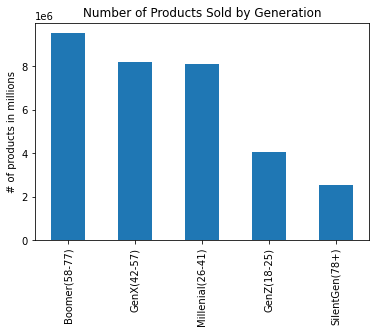

In [40]:
#create visualization for Generations

bar_Gen=df_opm_dept['Generation'].value_counts().plot.bar()
plt.title('Number of Products Sold by Generation')
plt.ylabel('# of products in millions')


In [41]:
bar_Gen.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Gen_prodct.png'))

In [42]:
df_opm_dept.groupby('Generation').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
Generation                           
Boomer(58-77)     7.796990  1.0  25.0
GenX(42-57)       7.790789  1.0  25.0
GenZ(18-25)       7.785748  1.0  25.0
Millenial(26-41)  7.787246  1.0  25.0
SilentGen(78+)    7.789497  1.0  25.0

In [43]:
df_opm_dept.groupby('Generation').agg({'user_order_number' : ['mean', 'min', 'max']})
# this is using every order number, so is lower than it should be to represent the mean and min number of orders

user_order_number        
                              mean min max
Generation                                
Boomer(58-77)            17.122193   1  99
GenX(42-57)              17.158065   1  99
GenZ(18-25)              17.173224   1  99
Millenial(26-41)         17.144745   1  99
SilentGen(78+)           17.110013   1  99

In [44]:
crosstab2 = pd.crosstab(df_opm_dept['Generation'], df_opm_dept['Region'], dropna = False)


In [45]:
crosstab2.to_clipboard()

In [46]:
crosstab3 = pd.crosstab(df_opm_dept['Generation'], df_opm_dept['department'], dropna = False)


In [47]:
crosstab3.to_clipboard()

### B. 'IncomeClass' customer profile & visualizations

In [48]:
# define low-income: single or divorced/widowed, no children, income <=34400
# define mid-income: single or divorced/widowed, no children, income >34400 and <=103200
# define upper-income: single or divorced/widowed, no children, income >103200

# define low-income: married w/ no children or divorced/widowed with 1 child, income <=43693
# define mid-income: married w/ no children or divorced/widowed with 1 child, income >43693 and <=131078
# define upper-income: married w/ no children or divorced/widowed with 1 child, income >131078

# define low-income: married, 1 child, income <=50697
# define low-income: divorced/widowed with 2 children, income <=50697
# define mid-income: married, 1 child, income >50697 and <=152092
# define mid-income: divorced/widowed with 2 children,, income >50697 and <=152092
# define upper-income: married, 1 child, income >152092
# define upper-income: divorced/widowed with 2 children, income >152092


# define low-income: married, >1 children, income <=60499
# define low-income: divorced/widowed with >2 children, income <=60499
# define mid-income: married, >1 children, income >60499 and <=181496
# define mid-income: divorced/widowed with >2 children, income >60499 and <=181496
# define upper-income: married, >1 children, income >181496
# define upper-income: divorced/widowed with >2 children, income >181496


# info on breakdown: https://www.gobankingrates.com/money/economy/americans-dont-know-what-class-theyre-in/

### 1 person household income ranges

In [49]:
df_opm_dept.loc[(df_opm_dept['fam_status']=='single') & (df_opm_dept['n_dependants']==0) & (df_opm_dept['income']<=34400),'IncomeClass']='low_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='divorced/widowed') & (df_opm_dept['n_dependants']==0) & (df_opm_dept['income']<=34400),'IncomeClass']='low_income'

In [50]:
df_opm_dept.loc[(df_opm_dept['fam_status']=='single') & (df_opm_dept['n_dependants']==0) & (df_opm_dept['income']>34400) & (df_opm_dept['income']<=103200),'IncomeClass']='mid_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='divorced/widowed') & (df_opm_dept['n_dependants']==0) & (df_opm_dept['income']>34400) & (df_opm_dept['income']<=103200),'IncomeClass']='mid_income'

In [51]:
df_opm_dept.loc[(df_opm_dept['fam_status']=='single') & (df_opm_dept['n_dependants']==0) & (df_opm_dept['income']>103200),'IncomeClass']='upper_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='divorced/widowed') & (df_opm_dept['n_dependants']==0) & (df_opm_dept['income']>103200),'IncomeClass']='upper_income'

In [52]:
df_opm_dept['IncomeClass'].value_counts(dropna=False)

NaN             24307356
mid_income       4414875
upper_income     3459257
low_income        223371
Name: IncomeClass, dtype: int64

### 2 person household income ranges

In [53]:
df_opm_dept.loc[(df_opm_dept['fam_status']=='married') & (df_opm_dept['n_dependants']==0) & (df_opm_dept['income']<=43693),'IncomeClass']='low_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='single') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']<=43693),'IncomeClass']='low_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='divorced/widowed') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']<=43693),'IncomeClass']='low_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='living with parents and siblings') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']<=43693),'IncomeClass']='low_income'

In [54]:
df_opm_dept.loc[(df_opm_dept['fam_status']=='married') & (df_opm_dept['n_dependants']==0) & (df_opm_dept['income']>43693) & (df_opm_dept['income']<=131078),'IncomeClass']='mid_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='single') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']>43693) & (df_opm_dept['income']<=131078),'IncomeClass']='mid_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='divorced/widowed') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']>43693) & (df_opm_dept['income']<=131078),'IncomeClass']='mid_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='living with parents and siblings') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']>43693) & (df_opm_dept['income']<=131078),'IncomeClass']='mid_income'

In [55]:
df_opm_dept.loc[(df_opm_dept['fam_status']=='married') & (df_opm_dept['n_dependants']==0) & (df_opm_dept['income']>131078),'IncomeClass']='upper_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='single') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']>131078),'IncomeClass']='upper_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='divorced/widowed') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']>131078),'IncomeClass']='upper_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='living with parents and siblings') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']>131078),'IncomeClass']='upper_income'

In [56]:
df_opm_dept['IncomeClass'].value_counts(dropna=False)

NaN             23777156
mid_income       4889239
upper_income     3466068
low_income        272396
Name: IncomeClass, dtype: int64

### 3 person household income ranges

In [57]:
df_opm_dept.loc[(df_opm_dept['fam_status']=='married') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']<=50697),'IncomeClass']='low_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='single') & (df_opm_dept['n_dependants']==2) & (df_opm_dept['income']<=50697),'IncomeClass']='low_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='living with parents and siblings') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']<=50697),'IncomeClass']='low_income'

In [58]:
df_opm_dept.loc[(df_opm_dept['fam_status']=='married') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']>50697) & (df_opm_dept['income']<=152092),'IncomeClass']='mid_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='single') & (df_opm_dept['n_dependants']==2) & (df_opm_dept['income']>50697) & (df_opm_dept['income']<=152092),'IncomeClass']='mid_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='living with parents and siblings') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']>50697) & (df_opm_dept['income']<=152092),'IncomeClass']='mid_income'

In [59]:
df_opm_dept.loc[(df_opm_dept['fam_status']=='married') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']>152092),'IncomeClass']='upper_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='single') & (df_opm_dept['n_dependants']==2) & (df_opm_dept['income']>152092),'IncomeClass']='upper_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='living with parents and siblings') & (df_opm_dept['n_dependants']==1) & (df_opm_dept['income']>152092),'IncomeClass']='upper_income'

In [60]:
df_opm_dept['IncomeClass'].value_counts(dropna=False)

NaN             16226252
mid_income      10686362
upper_income     4361240
low_income       1131005
Name: IncomeClass, dtype: int64

### 4+ person household income ranges

In [61]:
df_opm_dept.loc[(df_opm_dept['fam_status']=='married') & (df_opm_dept['n_dependants']>1) & (df_opm_dept['income']<=60499),'IncomeClass']='low_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='single') & (df_opm_dept['n_dependants']>2) & (df_opm_dept['income']<=60499),'IncomeClass']='low_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='living with parents and siblings') & (df_opm_dept['n_dependants']>1) & (df_opm_dept['income']<=60499),'IncomeClass']='low_income'

In [62]:
df_opm_dept.loc[(df_opm_dept['fam_status']=='married') & (df_opm_dept['n_dependants']>1) & (df_opm_dept['income']>60499) & (df_opm_dept['income']<=181496),'IncomeClass']='mid_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='single') & (df_opm_dept['n_dependants']>2) & (df_opm_dept['income']>60499) & (df_opm_dept['income']<=181496),'IncomeClass']='mid_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='living with parents and siblings') & (df_opm_dept['n_dependants']>1) & (df_opm_dept['income']>60499) & (df_opm_dept['income']<=181496),'IncomeClass']='mid_income'

In [63]:
df_opm_dept.loc[(df_opm_dept['fam_status']=='married') & (df_opm_dept['n_dependants']>1) & (df_opm_dept['income']>181496),'IncomeClass']='upper_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='single') & (df_opm_dept['n_dependants']>2) & (df_opm_dept['income']>181496),'IncomeClass']='upper_income'
df_opm_dept.loc[(df_opm_dept['fam_status']=='living with parents and siblings') & (df_opm_dept['n_dependants']>1) & (df_opm_dept['income']>181496),'IncomeClass']='upper_income'


In [64]:
df_opm_dept['IncomeClass'].value_counts(dropna=False)

mid_income      23616909
upper_income     4513235
low_income       4274715
Name: IncomeClass, dtype: int64

<AxesSubplot:ylabel='IncomeClass'>

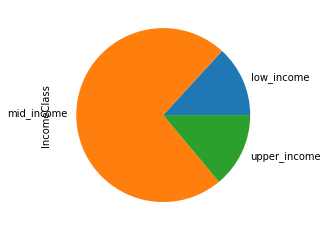

In [65]:
df_opm_dept['IncomeClass'].value_counts().sort_index().plot.pie()

In [66]:
df_opm_dept['IncomeClass'].value_counts()

mid_income      23616909
upper_income     4513235
low_income       4274715
Name: IncomeClass, dtype: int64

In [67]:
# number of unique values in each column to determine # of users/orders, not number of records
df_opm_dept.groupby('IncomeClass').nunique()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,STATE,Age,date_joined,n_dependants,fam_status,income,Region,active_cust_flag,department,Generation
IncomeClass,,,,,,,,,,,,,,,,,,,,,
low_income,515238,37026,99,7,24,31,43123,109,2,43125,...,51,64,1187,4,4,21924,4,2,21,5
mid_income,2271482,143090,99,7,24,31,49532,145,2,49534,...,51,64,1187,4,4,82406,4,2,21,5
upper_income,427965,26093,99,7,24,31,43824,121,2,43825,...,51,64,1187,4,4,21702,4,2,21,5


Text(0, 0.5, '# of users')

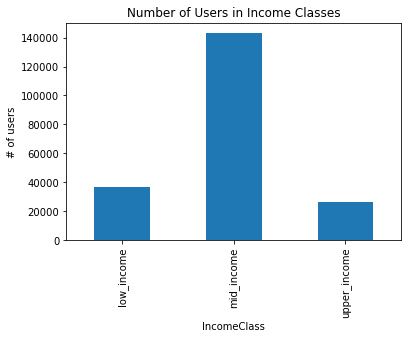

In [68]:
# bar graph of number of users in income classes
bar_ic=df_opm_dept.groupby('IncomeClass')['user_id'].nunique().plot.bar()
plt.title('Number of Users in Income Classes')
plt.ylabel('# of users')

In [69]:
# export bar graph
bar_ic.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_classes_userct.png'))

Text(0, 0.5, '# of orders in millions')

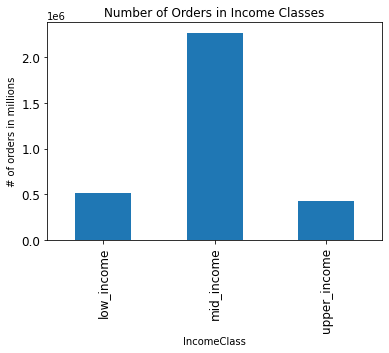

In [70]:
#bar graph of number of orders in income classes
bar_ic2=df_opm_dept.groupby('IncomeClass')['order_id'].nunique().plot.bar(fontsize=12)
plt.title('Number of Orders in Income Classes')
plt.ylabel('# of orders in millions')

In [71]:
bar_ic2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_classes_orderct.png'))

In [72]:
# aggregate min/max/avg of item prices by income class
df_opm_dept.groupby('IncomeClass').agg({'prices' : ['mean', 'min', 'max']})

prices           
                 mean  min   max
IncomeClass                     
low_income    6.97570  1.0  25.0
mid_income    7.90876  1.0  25.0
upper_income  7.94712  1.0  25.0

In [73]:
# aggregate min/max/avg of total number of orders by income class
df_opm_dept.groupby('IncomeClass').agg({'user_order_number' : ['mean', 'min', 'max']})
# this is using every user order number, so is lower than it should be

user_order_number        
                          mean min max
IncomeClass                           
low_income           16.222944   1  99
mid_income           17.215452   1  99
upper_income         17.630311   1  99

In [74]:
#crosstab to compare Income class to Regions
crosstab4 = pd.crosstab(df_opm_dept['IncomeClass'], df_opm_dept['Region'], dropna = False)


In [75]:
crosstab4.to_clipboard()

In [76]:
#crosstab to compare Income class to departments
crosstab5 = pd.crosstab(df_opm_dept['IncomeClass'], df_opm_dept['department'], dropna = False)


In [77]:
crosstab5.to_clipboard()

In [81]:
pd.set_option('display.max_columns', None)

In [90]:
df_opm_dept.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opcd.pkl'))

# 08 Further Analysis to Complete Project

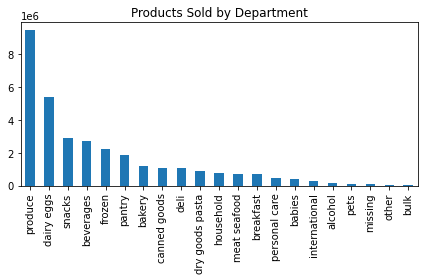

In [95]:
# bar graph to depict popular departments
bar_depts=df_opm_dept['department'].value_counts().plot.bar()
plt.title('Products Sold by Department')
plt.tight_layout()


In [96]:
# export bar for popular departments
bar_depts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_prods.png'))

### Explore products that are greater than 15 dollars

In [97]:
#create flag for items > $15
df_opm_dept.loc[df_opm_dept['prices']>15, 'upscale items']='high price'


In [98]:
df_opm_dept.loc[df_opm_dept['prices']<=15, 'upscale items']='low price'

In [103]:
#value counts for low/high priced items ; NaN is still the wildly priced items & intentional
df_opm_dept['upscale items'].value_counts(dropna=False)

low price     31987181
high price      412551
NaN               5127
Name: upscale items, dtype: int64

In [104]:
#name a new dataframe with the 'upscale items flag'
df_5=df_opm_dept[df_opm_dept['upscale items']=='high price']

In [110]:
#value counts in department in the upscale dataset
df_5['department'].value_counts()

meat seafood    412323
pantry             228
Name: department, dtype: int64

In [112]:
#look at overall dataset for all value counts for items purchased
df_opm_dept['department'].value_counts()

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64